In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, auc
import random
from numpy.random import permutation
import math
from sklearn import metrics

In [2]:
random.seed(1234)

In [3]:
col_names = ['Age','Gender','Education', 'Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Csore', 'Impulsive','SS','1','Amphet','3','4','5','6','7','Coke','9','10','Heroin','12','13','LSD','Meth','16','17','18','19']

In [4]:
data = pd.read_csv("drug_consumption.csv", names = col_names)

In [5]:
data.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Csore,...,10,Heroin,12,13,LSD,Meth,16,17,18,19
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [6]:
data['Age'] = round(data['Age'],3)
data['Gender'] = round(data['Gender'],3)
data['Education']= round(data['Education'],3)
data['Country'] = round(data['Country'],3)
data['Ethnicity'] = round(data['Ethnicity'],3)

In [7]:
data['Age'] = data['Age'].map({-0.952:"1", -0.079:"2", 0.498:"3", 1.094:"4", 1.822:"5", 2.592:"6"})

In [8]:
data['Gender'] = data['Gender'].map({0.482:'Female', -0.482:'Male'})

In [9]:
data['Education'] = data['Education'].map({-2.436:'1', -1.738: '2',-1.437:'3', -1.228:'4', -0.611: '5', -0.059:'6',0.455: '7', 1.164: '8', 1.984:'9'}) 

In [10]:
data['Country'] = data['Country'].map({-0.098: '1', 0.249:'2', -0.468:'3', -0.285:'4', 0.211:'5',0.961:'6', -0.570:'7'})

In [11]:
data['Ethnicity'] = data['Ethnicity'].map({-0.502:'1', 
-1.107:'2', 
1.907: '3', 
0.126: '4', 
-0.222: '5', 
0.114: '6',  
-0.317: '7'})

In [12]:
data.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Csore,...,10,Heroin,12,13,LSD,Meth,16,17,18,19
0,3,Female,6,6,4,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,Male,9,6,7,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,Male,6,6,7,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,1,Female,8,6,7,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,3,Female,9,6,7,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [13]:
amended_data = data.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,13,19,22,25,26]]

In [14]:
amended_data.head(5)

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Csore,Impulsive,SS,Amphet,Coke,Heroin,LSD,Meth
0,3,Female,6,6,4,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL2,CL0,CL0,CL0,CL0
1,2,Male,9,6,7,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL2,CL3,CL0,CL2,CL3
2,3,Male,6,6,7,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL0,CL0,CL0,CL0,CL0
3,1,Female,8,6,7,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL0,CL2,CL0,CL0,CL0
4,3,Female,9,6,7,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL1,CL0,CL0,CL0,CL0


In [15]:
amended_data = data.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,13,16,18,19,22,25,26]]

In [16]:
amended_data.head(5)

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Csore,Impulsive,SS,Amphet,5,7,Coke,Heroin,LSD,Meth
0,3,Female,6,6,4,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL2,CL6,CL5,CL0,CL0,CL0,CL0
1,2,Male,9,6,7,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL2,CL6,CL6,CL3,CL0,CL2,CL3
2,3,Male,6,6,7,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL0,CL6,CL4,CL0,CL0,CL0,CL0
3,1,Female,8,6,7,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL0,CL5,CL4,CL2,CL0,CL0,CL0
4,3,Female,9,6,7,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL1,CL6,CL6,CL0,CL0,CL0,CL0


In [17]:
amended_data = amended_data.replace(['CL0','CL1','CL2','CL3','CL4','CL5','CL6'],[0,1,1,2,2,3,3])

# Hot Encoding for Categorical Data

In [18]:
# limit to categorical data using df.select_dtypes()
X = amended_data[['Age', 'Gender', 'Education', 'Country','Ethnicity']]

# check original shape
print(X.shape)

# view columns using df.columns
print(X.columns)


# 1. INSTANTIATE
enc = preprocessing.OneHotEncoder()

# 2. FIT
enc.fit(X)

# 3. Transform
onehotlabels = enc.transform(X).toarray()
onehotlabels.shape


X = pd.DataFrame(onehotlabels)
X.columns= ['Age1','Age2','Age3','Age4','Age5','Age6','Female', 'Male','Ed1', 'Ed2','Ed3','Ed4','Ed5','Ed6','Ed7','Ed8','Ed9','Aus','Canada','NZ','Other','Ireland','UK','USA','Asian','Black', 'AB','WA','WB','Other','White']

(1885, 5)
Index(['Age', 'Gender', 'Education', 'Country', 'Ethnicity'], dtype='object')


In [19]:
Y = amended_data.loc[:,['Nscore', 'Escore', 'Oscore', 'Ascore', 'Csore', 'Impulsive','SS','Amphet','Coke','Heroin','LSD','Meth']]
encoded_data = pd.concat([X,Y], axis = 1, sort = False)

In [20]:
encoded_data['Drug_indicator'] = encoded_data[['Amphet', 'Coke', 'Heroin', 'LSD', 'Meth']].max(axis = 1)

In [21]:
encoded_data.head()

,Age1,Age2,Age3,Age4,Age5,Age6,Female,Male,Ed1,Ed2,...,Ascore,Csore,Impulsive,SS,Amphet,Coke,Heroin,LSD,Meth,Drug_indicator
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.91699,-0.00665,-0.21712,-1.18084,1,0,0,0,0,1
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.76096,-0.14277,-0.71126,-0.21575,1,2,0,1,2,2
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-1.62090,-1.01450,-1.37983,0.40148,0,0,0,0,0,0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.59042,0.58489,-1.37983,-1.18084,0,1,0,0,0,1
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.30172,1.30612,-0.21712,-0.21575,1,0,0,0,0,1


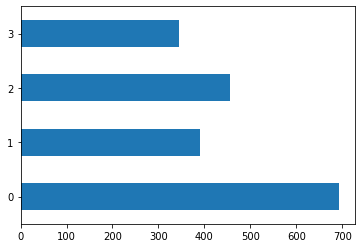

In [22]:
order = ["0", "1", "2", "3"]
s = encoded_data['Drug_indicator'].astype(str).value_counts()
s.reindex(np.intersect1d(order, s.index)).plot('barh')

# PCA Visualization for Drug indicator

In [23]:
from sklearn.decomposition import PCA

In [24]:
features = ['Age1','Age2','Age3','Age4','Age5','Age6','Female', 'Male','Ed1', 'Ed2','Ed3','Ed4','Ed5','Ed6','Ed7','Ed8','Ed9','Aus','Canada','NZ','Other','Ireland','UK','USA','Asian','Black', 'AB','WA','WB','Other','White','Nscore', 'Escore', 'Oscore', 'Ascore', 'Csore', 'Impulsive','SS']

In [25]:
#Separating out the features
x = encoded_data.loc[:,features].values

In [26]:
#Separating out the target
y = encoded_data.loc[:,['Drug_indicator']].values

In [27]:
pca = PCA(n_components = 2)

In [28]:
principalComponents = pca.fit_transform(x)

In [29]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [30]:
finalDf = pd.concat([principalDf, encoded_data[['Drug_indicator']]], axis = 1)
#finalDf['Drug_indicator']= pd.to_numeric(finalDf['Drug_indicator'])
finalDf.head()

,principal component 1,principal component 2,Drug_indicator
0,-0.685644,-1.430786,1
1,-0.639593,1.976180,2
2,-0.062524,-0.457673,0
3,-1.784529,-0.776373,1
4,-0.727841,-1.370656,1


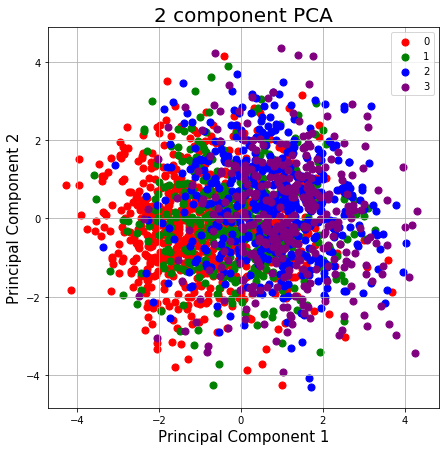

In [31]:
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1,2, 3]
colors = ['r', 'g', 'b', 'purple']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Drug_indicator'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Hence, we conclude that there isn't much difference between people who have used drug over varying periods of time however, there is a noticeable difference in the people who have never used drug and the people who have used drug at some point in their life.

# KNN
Multi class - comparison between 5 and 50 neighbors.

In [32]:
# Randomly shuffle the index.
random_indices = permutation(encoded_data.index)

# Set a cutoff for how many items we want in the test set (in this case 1/3 of the items)
test_cutoff = math.floor(len(encoded_data)/3)

# Generate the test set by taking the first 1/3 of the randomly shuffled indices.
test = encoded_data.loc[random_indices[1:test_cutoff]]

# Generate the train set with the rest of the data.
train = encoded_data.loc[random_indices[test_cutoff:]]

In [33]:
# The columns that we will be making predictions with.
x_columns = ['Age1','Age2','Age3','Age4','Age5','Age6','Female', 'Male','Ed1', 'Ed2','Ed3','Ed4','Ed5','Ed6','Ed7','Ed8','Ed9','Aus','Canada','NZ','Other','Ireland','UK','USA','Asian','Black', 'AB','WA','WB','Other','White','Nscore', 'Escore', 'Oscore', 'Ascore', 'Csore', 'Impulsive','SS']
# The column that we want to predict.
y_column = ['Drug_indicator']

from sklearn.neighbors import KNeighborsRegressor
# Create the knn model.
# Look at the five closest neighbors.
knn = KNeighborsRegressor(n_neighbors=5)
# Fit the model on the training data.
knn.fit(train[x_columns], train[y_column])
# Make point predictions on the test set using the fit model.
predictions = knn.predict(test[x_columns])

for i in range(len(predictions)):
    if predictions[i] > 0.5 and predictions[i] < 1.5:
        predictions[i] = 1
    elif predictions[i] > 1.5 and predictions[i]<2.5:
        predictions[i] = 2
    elif predictions[i] > 2.5:
        predictions[i] = 3
    else: predictions[i] =0
        
# Get the actual values for the test set.
actual = test[y_column]

from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(predictions, actual))

Accuracy: 0.4258373205741627


In [34]:
# The columns that we will be making predictions with.
x_columns = ['Age1','Age2','Age3','Age4','Age5','Age6','Female', 'Male','Ed1', 'Ed2','Ed3','Ed4','Ed5','Ed6','Ed7','Ed8','Ed9','Aus','Canada','NZ','Other','Ireland','UK','USA','Asian','Black', 'AB','WA','WB','Other','White','Nscore', 'Escore', 'Oscore', 'Ascore', 'Csore', 'Impulsive','SS']
# The column that we want to predict.
y_column = ['LSD']

from sklearn.neighbors import KNeighborsRegressor
# Create the knn model.
# Look at the fifty closest neighbors.
knn = KNeighborsRegressor(n_neighbors=50)
# Fit the model on the training data.
knn.fit(train[x_columns], train[y_column])
# Make point predictions on the test set using the fit model.
predictions = knn.predict(test[x_columns])

for i in range(len(predictions)):
    if predictions[i] > 0.5 and predictions[i] < 1.5:
        predictions[i] = 1
    elif predictions[i] > 1.5 and predictions[i]<2.5:
        predictions[i] = 2
    elif predictions[i] > 2.5:
        predictions[i] = 3
    else: predictions[i] =0
        

# Get the actual values for the test set.
actual = test[y_column]

from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(predictions, actual))

Accuracy: 0.5422647527910686


Hence, in multi class knn, there is no significant diffference in the accuracy when the closest neighbors are set to 5 or 50

#Convert to binary classification

In [35]:
binary_data = encoded_data

In [36]:
binary_data['Drug_indicator'] = binary_data['Drug_indicator'].map({0:0, 1:1, 2:1, 3:1})


In [37]:
binary_data.head()


,Age1,Age2,Age3,Age4,Age5,Age6,Female,Male,Ed1,Ed2,...,Ascore,Csore,Impulsive,SS,Amphet,Coke,Heroin,LSD,Meth,Drug_indicator
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.91699,-0.00665,-0.21712,-1.18084,1,0,0,0,0,1
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.76096,-0.14277,-0.71126,-0.21575,1,2,0,1,2,1
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-1.62090,-1.01450,-1.37983,0.40148,0,0,0,0,0,0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.59042,0.58489,-1.37983,-1.18084,0,1,0,0,0,1
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.30172,1.30612,-0.21712,-0.21575,1,0,0,0,0,1


In [38]:
# Randomly shuffle the index.
random_indices = permutation(binary_data.index)

# Set a cutoff for how many items we want in the test set (in this case 1/3 of the items)
test_cutoff = math.floor(len(binary_data)/3)

# Generate the test set by taking the first 1/3 of the randomly shuffled indices.
test = binary_data.loc[random_indices[1:test_cutoff]]

# Generate the train set with the rest of the data.
train = binary_data.loc[random_indices[test_cutoff:]]

In [39]:
# The columns that we will be making predictions with.
x_columns = ['Age1','Age2','Age3','Age4','Age5','Age6','Female', 'Male','Ed1', 'Ed2','Ed3','Ed4','Ed5','Ed6','Ed7','Ed8','Ed9','Aus','Canada','NZ','Other','Ireland','UK','USA','Asian','Black', 'AB','WA','WB','Other','White','Nscore', 'Escore', 'Oscore', 'Ascore', 'Csore', 'Impulsive','SS']
# The column that we want to predict.
y_column = ['Drug_indicator']

from sklearn.neighbors import KNeighborsRegressor
# Create the knn model.
# Look at the five closest neighbors.
knn = KNeighborsRegressor(n_neighbors=5)
# Fit the model on the training data.
knn.fit(train[x_columns], train[y_column])
# Make point predictions on the test set using the fit model.
predictions = knn.predict(test[x_columns])

for i in range(len(predictions)):
    if predictions[i] > 0.5:
        predictions[i] = 1
    else: predictions[i] =0
        
# Get the actual values for the test set.
actual = test[y_column]

from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(predictions, actual))

Accuracy: 0.7464114832535885


In [40]:
# The columns that we will be making predictions with.
x_columns = ['Age1','Age2','Age3','Age4','Age5','Age6','Female', 'Male','Ed1', 'Ed2','Ed3','Ed4','Ed5','Ed6','Ed7','Ed8','Ed9','Aus','Canada','NZ','Other','Ireland','UK','USA','Asian','Black', 'AB','WA','WB','Other','White','Nscore', 'Escore', 'Oscore', 'Ascore', 'Csore', 'Impulsive','SS']
# The column that we want to predict.
y_column = ['Drug_indicator']

from sklearn.neighbors import KNeighborsRegressor
# Create the knn model.
# Look at the five closest neighbors.
knn = KNeighborsRegressor(n_neighbors=50)
# Fit the model on the training data.
knn.fit(train[x_columns], train[y_column])
# Make point predictions on the test set using the fit model.
predictions = knn.predict(test[x_columns])

for i in range(len(predictions)):
    if predictions[i] > 0.5:
        predictions[i] = 1
    else: predictions[i] =0
        
# Get the actual values for the test set.
actual = test[y_column]

from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(predictions, actual))

Accuracy: 0.748006379585327


Hence, we find a significant improvement in the KNN model when used for binary classification instead of multi class classification. The model with 50 neighbors performs slightly better than the one with 5 closest neighbors.

#Data cleaning for random forest and logistic regression

In [41]:
amended_data = data.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,13,19,22,25,26]]

In [42]:
encoded_data = amended_data.copy()
encoded_data['Drug_indicator'] = amended_data[['Amphet', 'Coke', 'Heroin', 'LSD', 'Meth']].max(axis = 1)

In [43]:
def string_to_numeric(x):
    if x == 'Female' :
        return 1
    if x == 'Male' :
        return 0

In [44]:
encoded_data['Gender'] = encoded_data['Gender'].apply(string_to_numeric)

In [45]:
# Randomly shuffle the index.
random_indices = permutation(encoded_data.index)

# Set a cutoff for how many items we want in the test set (in this case 1/3 of the items)
test_cutoff = math.floor(len(encoded_data)/3)

# Generate the test set by taking the first 1/3 of the randomly shuffled indices.
test = encoded_data.loc[random_indices[1:test_cutoff]]

# Generate the train set with the rest of the data.
train = encoded_data.loc[random_indices[test_cutoff:]]

# Multi class random forest 

In [46]:
# The columns that we will be making predictions with.
x_columns = ['Age','Gender','Education','Country','Ethnicity','Nscore', 'Escore', 'Oscore', 'Ascore', 'Csore', 'Impulsive','SS']
# The column that we want to predict.
y_column = ['Drug_indicator']

In [47]:
train.head(5)

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Csore,Impulsive,SS,Amphet,Coke,Heroin,LSD,Meth,Drug_indicator
1637,3,1,6,6,7,0.31287,0.63779,-0.58331,0.59042,0.12331,0.52975,0.07987,CL0,CL0,CL0,CL0,CL0,CL0
1151,1,0,4,4,7,0.52135,-0.80615,-0.17779,-0.15487,-1.92173,0.52975,1.22470,CL3,CL0,CL0,CL3,CL3,CL3
1343,4,0,5,7,7,0.82562,-0.15487,0.44585,-0.15487,0.12331,0.19268,-0.21575,CL0,CL1,CL0,CL4,CL0,CL4
526,1,0,6,6,7,0.91093,-1.37639,-0.31776,-1.92595,-1.38502,0.88113,0.07987,CL0,CL4,CL0,CL0,CL3,CL4
1365,1,1,5,7,7,1.49158,0.63779,1.06238,-1.47955,-1.13788,0.88113,0.76540,CL5,CL0,CL4,CL2,CL3,CL5


In [48]:
trainy = np.array(train[y_column]).reshape(1257)

Criterion is the function to measure the quality of a split. Supported criteria are "gini" for the Gini impurity and "Entropy" for the information gain.

In [49]:
rfc=RandomForestClassifier(criterion='entropy')
rfc.fit(train[x_columns],trainy)
rfc_preds=rfc.predict(test[x_columns])

/Users/juinerurkar/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [50]:
# Two ways of getting accuracy
print(rfc.score(test[x_columns],test[y_column]))
print("Accuracy:",metrics.accuracy_score(rfc_preds, test[y_column]))

0.4130781499202552
Accuracy: 0.4130781499202552


In [51]:
rfc2=RandomForestClassifier(criterion='gini')
rfc2.fit(train[x_columns],trainy)
rfc_preds2=rfc2.predict(test[x_columns])

/Users/juinerurkar/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [52]:
# Two ways of getting accuracy
print(rfc2.score(test[x_columns],test[y_column]))
print("Accuracy:",metrics.accuracy_score(rfc_preds2, test[y_column]))

0.4258373205741627
Accuracy: 0.4258373205741627


In [55]:
f1_score(test[y_column], rfc_preds2, average='weighted')

0.38697366444860887

# Binary Classification - logistic regression

In [56]:
#convert y to be binary
binary_data = encoded_data

In [57]:
binary_data = binary_data.replace(['CL0','CL1','CL2','CL3','CL4','CL5','CL6'],[0,1,1,2,2,3,3])
binary_data['Drug_indicator'] = binary_data['Drug_indicator'].map({0:0, 1:1, 2:1, 3:1})

In [58]:

binary_data.head(5)

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Csore,Impulsive,SS,Amphet,Coke,Heroin,LSD,Meth,Drug_indicator
0,3,1,6,6,4,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,1,0,0,0,0,1
1,2,0,9,6,7,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1,2,0,1,2,1
2,3,0,6,6,7,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0,0,0,0,0,0
3,1,1,8,6,7,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0,1,0,0,0,1
4,3,1,9,6,7,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1,0,0,0,0,1


In [59]:
# Randomly shuffle the index.
random_indices = permutation(binary_data.index)

# Set a cutoff for how many items we want in the test set (in this case 1/3 of the items)
test_cutoff = math.floor(len(binary_data)/3)

# Generate the test set by taking the first 1/3 of the randomly shuffled indices.
test = binary_data.loc[random_indices[1:test_cutoff]]

# Generate the train set with the rest of the data.
train = binary_data.loc[random_indices[test_cutoff:]]

In [60]:
trainy = np.array(train[y_column]).reshape(1257)

In [61]:
lr = LogisticRegression()
lr.fit(train[x_columns], trainy)
lr_preds = lr.predict(test[x_columns])

/Users/juinerurkar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [62]:
print(lr.score(test[x_columns], test[y_column]))

0.784688995215311


In [63]:
def plotAUC(truth, pred, lab):
    fpr, tpr, thresholds = roc_curve(truth, pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label= lab+' (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC')
    plt.legend(loc="lower right")

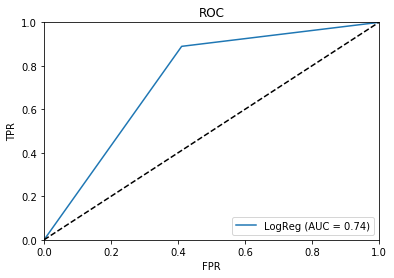

In [64]:
plotAUC(test[y_column], lr_preds,'LogReg')